CUSTOMER CHURN ANALYSIS

Step 1:Understanding the data

In [107]:
 
# load in some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats



In [108]:
#Read the data
customer_data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [109]:
#Check dimensions
customer_data.shape

(7043, 21)

In [110]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
#Check the first 10 rows
customer_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [112]:
#looking at the columns
customer_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Step2: Data cleaning and preprocessing

In [113]:
index =np.where(customer_data["TotalCharges"] == max(customer_data["TotalCharges"]) )
customer_data.loc[index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.2,999.9,No


In [114]:
#Remove unecessary columns
customer_data=customer_data.drop( ["PhoneService","StreamingTV","StreamingMovies","MultipleLines","PaperlessBilling"], axis=1).copy()

In [115]:
customer_data["TotalCharges"] = customer_data["TotalCharges"].apply(lambda x: pd.to_numeric(x, errors="coerce")).dropna()

In [116]:
customer_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
Contract             0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [117]:
customer_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [118]:
customer_data.rename(columns={"gender":"Gender","tenure":"Tenure"},inplace=True)


In [121]:
customer_data.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [122]:
customer_data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [124]:
categorical = customer_data.dtypes[customer_data.dtypes == "object"].index
print(categorical)

customer_data[categorical].describe()

Index(['customerID', 'Gender', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaymentMethod', 'Churn'],
      dtype='object')


,customerID,Gender,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,3,3,3,3,3,3,4,2
top,7590-VHVEG,Male,No,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check,No
freq,1,3555,3641,4933,3096,3498,3088,3095,3473,3875,2365,5174


In [125]:
#Replace all null values with zero
customer_data = customer_data.fillna(0)
customer_data

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes


In [144]:
customer_data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [145]:
#Unique elements in categorical column
print(customer_data["Gender"].unique())
print(customer_data["Churn"].unique())

['Female' 'Male']
['No' 'Yes']


In [146]:
#using one-hot encoding for categorical column
Gender=pd.get_dummies(customer_data.Gender)
print(Gender)

      Female  Male
0          1     0
1          0     1
2          0     1
3          0     1
4          1     0
...      ...   ...
7038       0     1
7039       1     0
7040       1     0
7041       0     1
7042       0     1

[7043 rows x 2 columns]


In [184]:
merged=pd.concat([customer_data,Gender], axis=1)
merged

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.50,No,0,1
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No,0,1
4,9237-HQITU,Female,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Mailed check,84.80,1990.50,No,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Credit card (automatic),103.20,7362.90,No,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes,0,1


In [186]:
new_df=merged.drop(["Gender"],axis=1)
new_df

,customerID,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male
0,7590-VHVEG,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,0,No,No,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.50,No,0,1
2,3668-QPYBK,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No,0,1
4,9237-HQITU,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Mailed check,84.80,1990.50,No,0,1
7039,2234-XADUH,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Credit card (automatic),103.20,7362.90,No,1,0
7040,4801-JZAZL,0,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,1,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes,0,1


In [187]:
new_df.head()

,customerID,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male
0,7590-VHVEG,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,0,No,No,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.50,No,0,1
2,3668-QPYBK,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No,0,1
4,9237-HQITU,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,1,0


Step3: Data Exploration

In [188]:
#perform descriptive statiatics
new_df.describe()



,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Female,Male
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.495244,0.504756
std,0.368612,24.559481,30.090047,2266.794470,0.500013,0.500013
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,1.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000


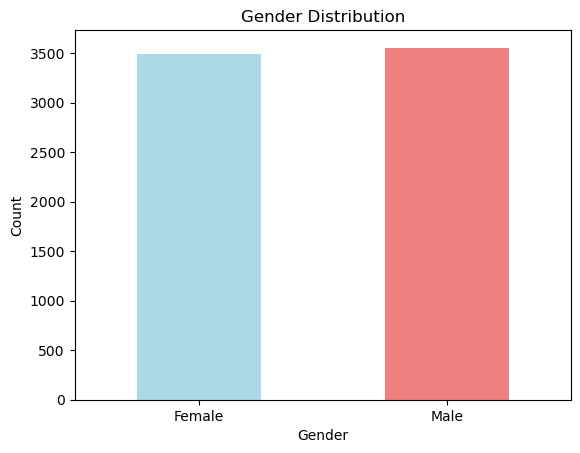

In [190]:
##Explore the distribution of key variables, such as customer demographics (age, gender), usage patterns (monthly charges, total charges), and churn status
#customer demographics(gender)
# Group the data by Female and Male and calculate counts
gender_counts = new_df[['Female', 'Male']].sum()
gender_counts

# Define custom colors for the bars
colors = ['lightblue', 'lightcoral']

# Create a bar plot with custom colors
gender_counts.plot(kind='bar', rot=0, color=colors)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


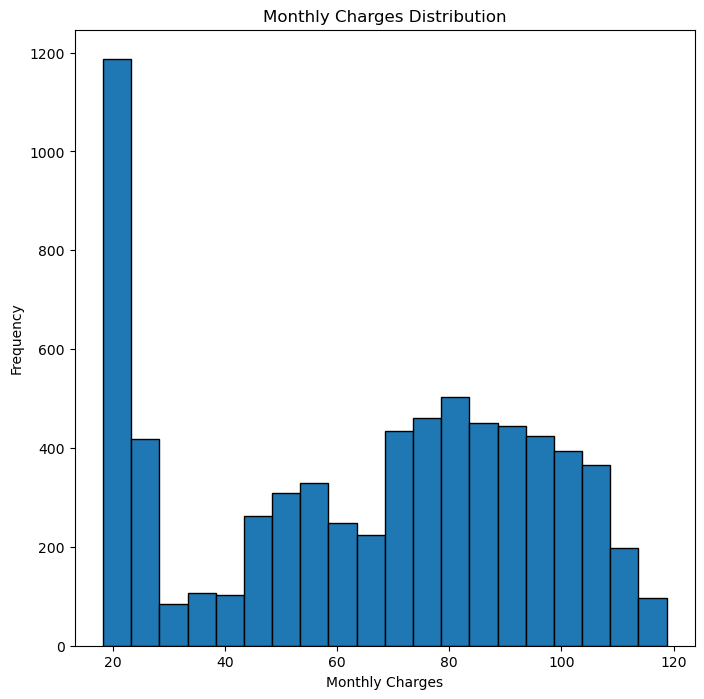

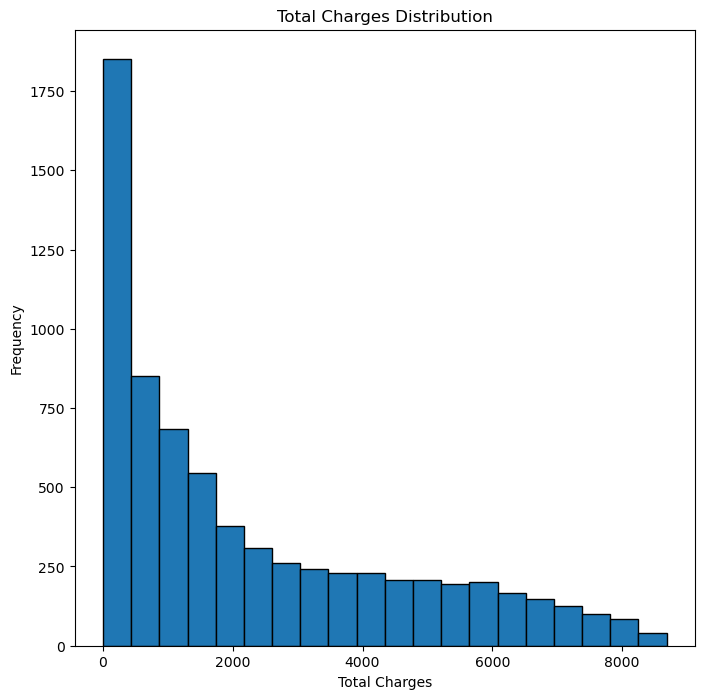

In [156]:
# Usage Patterns (Monthly Charges and Total Charges)

monthly_charge= new_df['MonthlyCharges'].describe()
total_charge= new_df['TotalCharges'].describe()
monthly_charge
total_charge

# Histogram for Monthly Charges
plt.figure(figsize=(8, 8))
plt.hist(new_df['MonthlyCharges'], bins=20, edgecolor='k')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')
plt.show()

# Histogram for Total Charges
plt.figure(figsize=(8, 8))
plt.hist(new_df['TotalCharges'], bins=20, edgecolor='k')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')
plt.show()


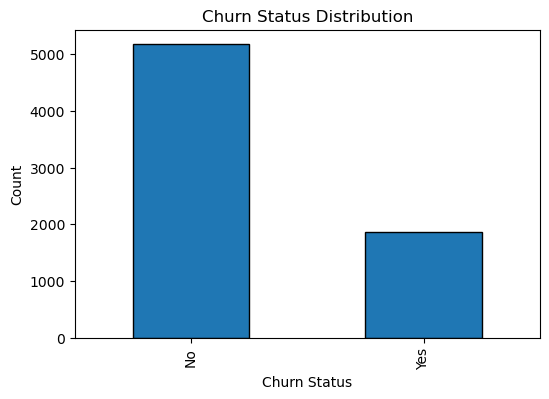

In [157]:
# Calculate the distribution of churned vs. non-churned
churn_distribution = new_df['Churn'].value_counts()
churn_distribution

# Visualize it with bar plot
plt.figure(figsize=(6, 4))
new_df['Churn'].value_counts().plot(kind='bar', edgecolor='k')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Status Distribution')
plt.show()

C:\Users\dee\AppData\Local\Temp\ipykernel_11008\1644292283.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


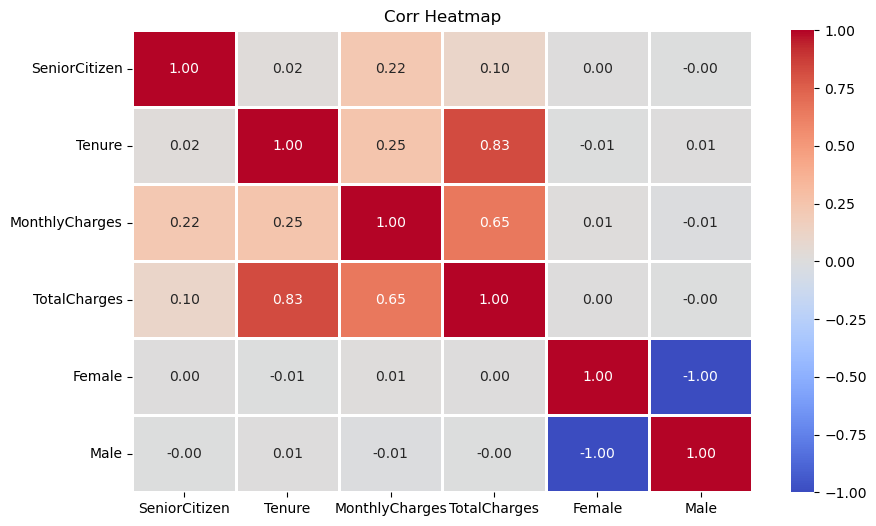

In [191]:
# Calculate and visualize correlations between variables using a heatmap.

# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.75)
plt.title('Corr Heatmap')
plt.show()

In [192]:
# churned customers
churned = new_df[new_df['Churn'] == 'Yes']['MonthlyCharges']
# Non-churned customers
non_churned = new_df[new_df['Churn'] == 'No']['MonthlyCharges']

# t-test to compare the means of churn and non churn groups
t_statistic, p_value = stats.ttest_ind(churned, non_churned, equal_var=False)

# Print the t-statistic and p-value
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("There is a significant difference between churned and non-churned customers.")
else:
    print("There is no significant difference between churned and non-churned customers.")

T-statistic: 18.407526676414673
P-value: 8.59244933154705e-73
There is a significant difference between churned and non-churned customers.


In [193]:
# Create summary tables and statistics for various customer segments (e.g., by contract type, payment method).

# Group the data by Contract type and calculate summary statistics
contract_summary = new_df .groupby('Contract').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std']
}).reset_index()

# Rename columns for clarity
contract_summary.columns = ['Contract', 'Mean_MonthlyCharges', 'Median_MonthlyCharges', 'Std_MonthlyCharges', 'Count_MonthlyCharges', 'Mean_TotalCharges', 'Median_TotalCharges', 'Std_TotalCharges']

# Print the summary table for contract segments
print("Summary Statistics by Contract Type:")
print(contract_summary)

Summary Statistics by Contract Type:
         Contract  Mean_MonthlyCharges  Median_MonthlyCharges  \
0  Month-to-month            66.398490                  73.25   
1        One year            65.048608                  68.75   
2        Two year            60.770413                  64.35   

   Std_MonthlyCharges  Count_MonthlyCharges  Mean_TotalCharges  \
0           26.926599                  3875        1369.254581   
1           31.840539                  1473        3032.622878   
2           34.678865                  1695        3706.934336   

   Median_TotalCharges  Std_TotalCharges  
0               679.55       1613.879008  
1              2656.70       2230.374581  
2              3593.80       2579.517834  


In [194]:


# Group the data by Payment Method and calculate summary statistics
payment_summary = new_df.groupby('PaymentMethod').agg({
    'MonthlyCharges': ['mean', 'median', 'std', 'count'],
    'TotalCharges': ['mean', 'median', 'std']
}).reset_index()

# Rename columns for clarity
payment_summary.columns = ['PaymentMethod', 'Mean_MonthlyCharges', 'Median_MonthlyCharges', 'Std_MonthlyCharges', 'Count_MonthlyCharges', 'Mean_TotalCharges', 'Median_TotalCharges', 'Std_TotalCharges']

# Print the summary table for payment method segments
print("\nSummary Statistics by PaymentMethod:")
print(payment_summary)



Summary Statistics by PaymentMethod:
               PaymentMethod  Mean_MonthlyCharges  Median_MonthlyCharges  \
0  Bank transfer (automatic)            67.192649                 73.100   
1    Credit card (automatic)            66.512385                 73.025   
2           Electronic check            76.255814                 80.550   
3               Mailed check            43.917060                 34.700   

   Std_MonthlyCharges  Count_MonthlyCharges  Mean_TotalCharges  \
0           30.555200                  1544        3075.310816   
1           30.612424                  1522        3069.378022   
2           24.053655                  2365        2090.868182   
3           26.314665                  1612        1049.250744   

   Median_TotalCharges  Std_TotalCharges  
0             2472.775       2358.810261  
1             2445.950       2407.898470  
2             1253.900       2155.435320  
3              465.250       1441.189486  


Step4: Data Visualization

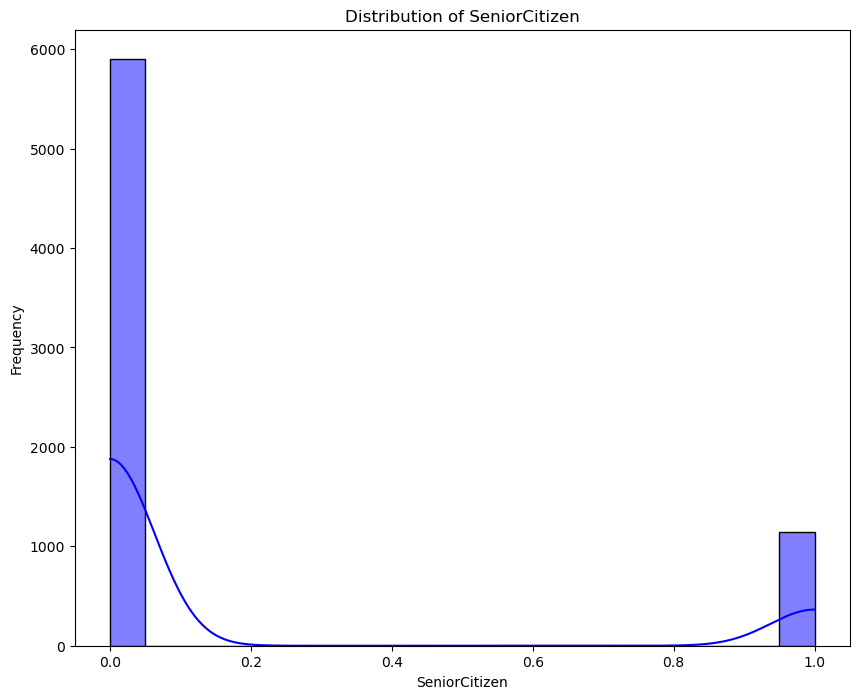

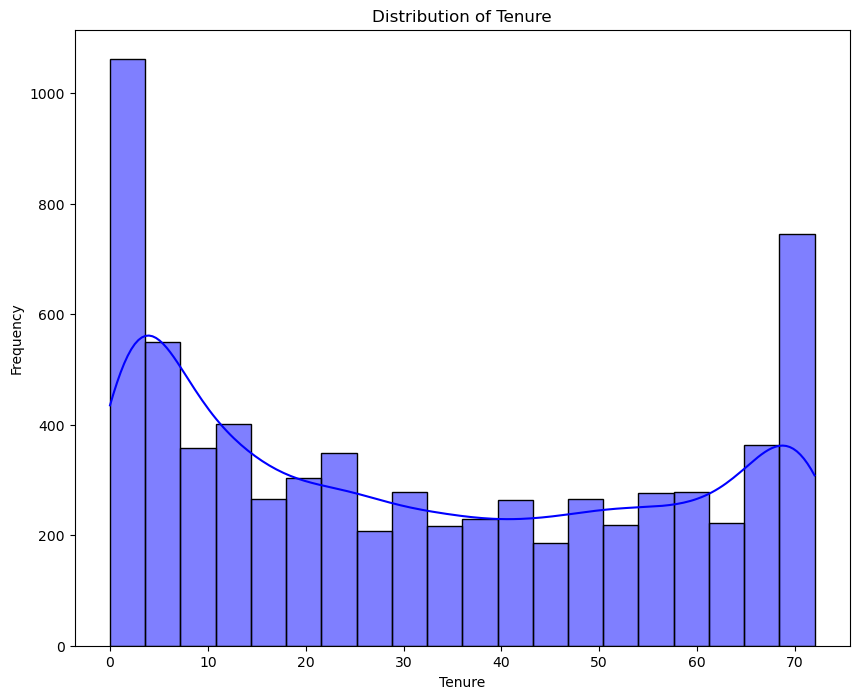

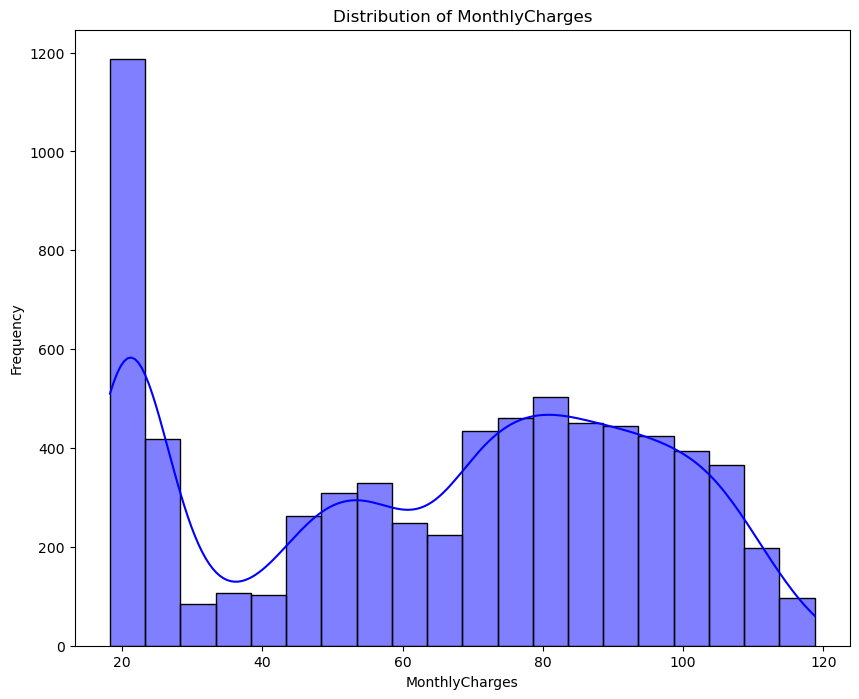

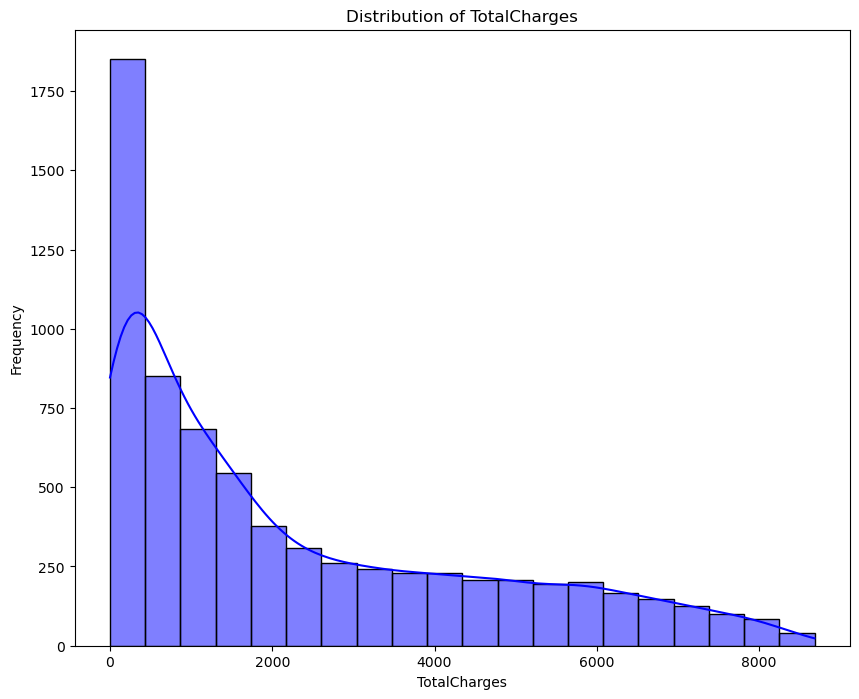

In [174]:


# # Identify categorical and numeric columns
# categorical_columns =new_df.select_dtypes(include=['object']).columns
# numeric_columns = new_df.select_dtypes(exclude=['object']).columns

# # Create bar plots for categorical variables
# for col in categorical_columns:
#     plt.figure(figsize=(10, 8))
#     sns.countplot(data=new_df, x=col)
#     plt.title(f'{col} Distribution')
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()

# # Create histograms for numeric variables
# for col in numeric_columns:
#     plt.figure(figsize=(10, 8))
#     sns.histplot(data=new_df, x=col, kde=True, bins=20)
#     plt.title(f'{col} Distribution')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
    # plt.show()

# Identify the numeric variables in new df
numeric_variables = new_df.select_dtypes(include=['float64', 'int64']).columns

# Loop through the numeric variables and create distribution plots
for var in numeric_variables:
    plt.figure(figsize=(10, 8))
    
    # Create a distribution plot (you can choose between a histogram or density plot)
    sns.histplot(new_df[var], kde=True, bins=20, color='blue')
    
    # Set labels and title
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

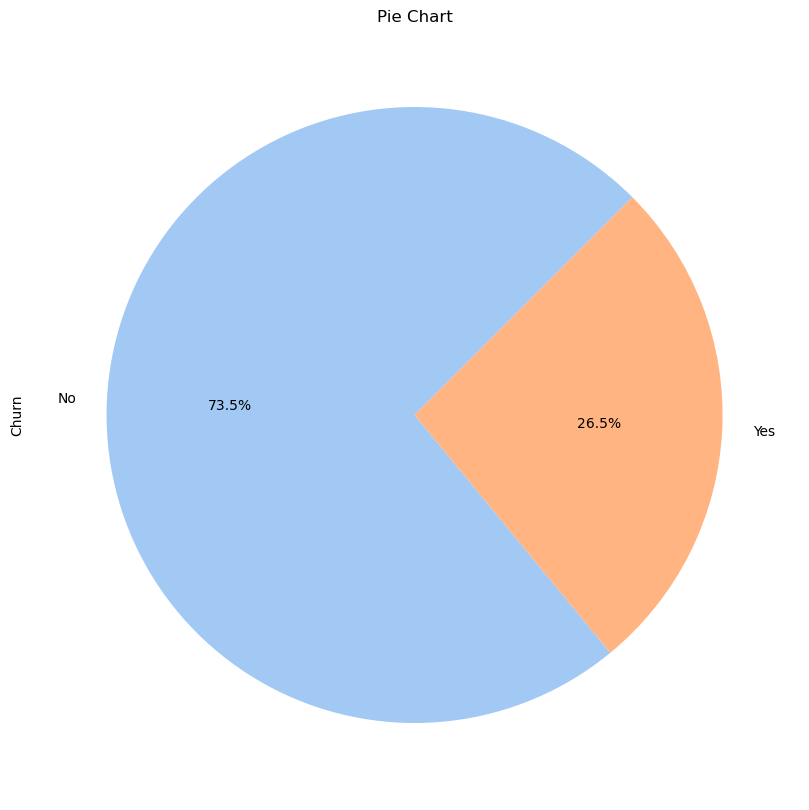

In [183]:
plt.figure(figsize=(10,10))
data=new_df["Churn"].value_counts()
data.plot(kind="pie",autopct="%0.1f%%",startangle=45,colors=sns.color_palette("pastel"))
plt.title("Pie Chart")

plt.show

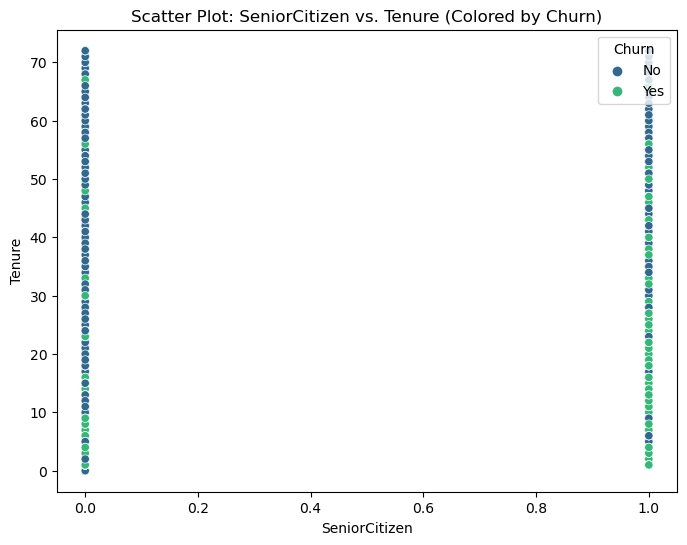

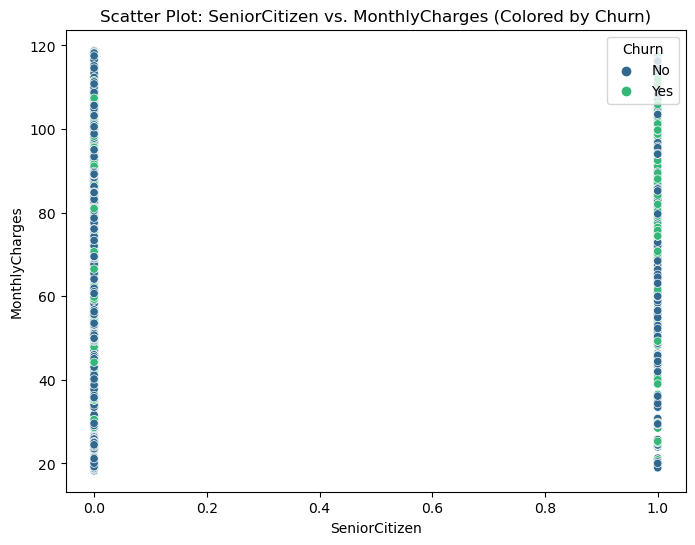

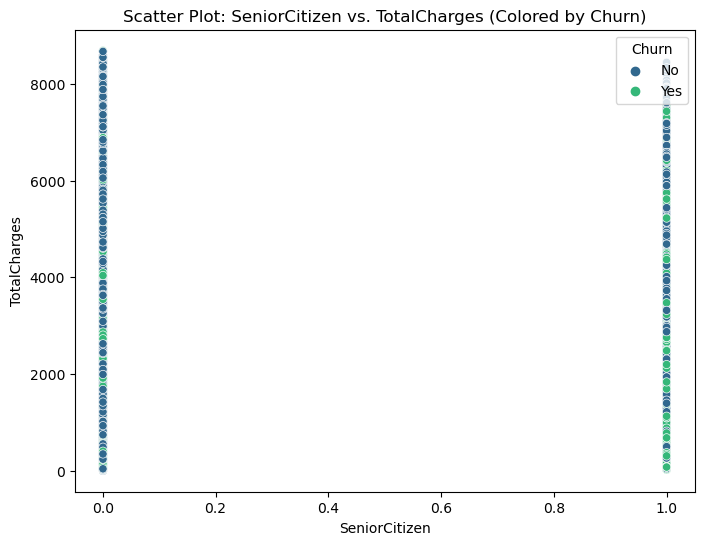

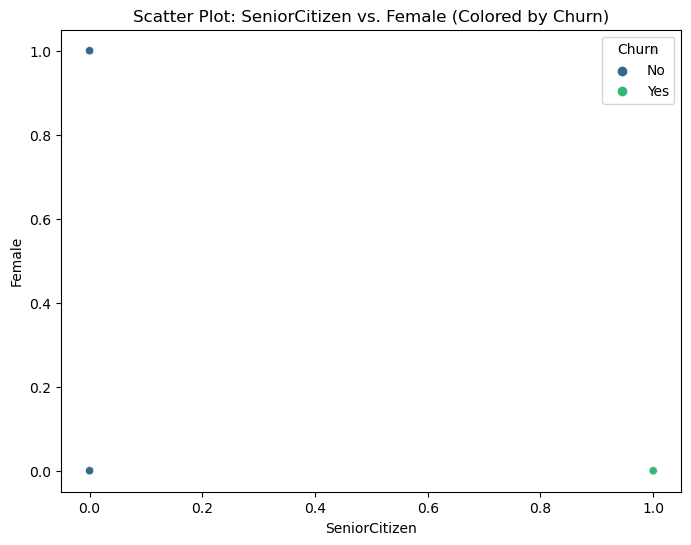

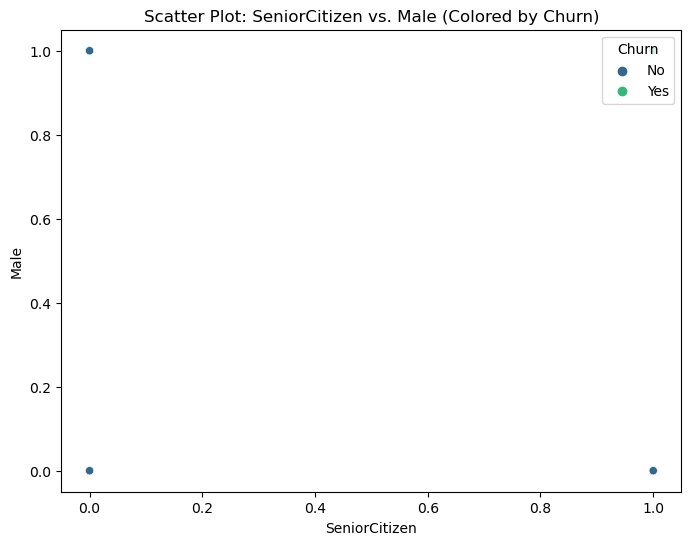

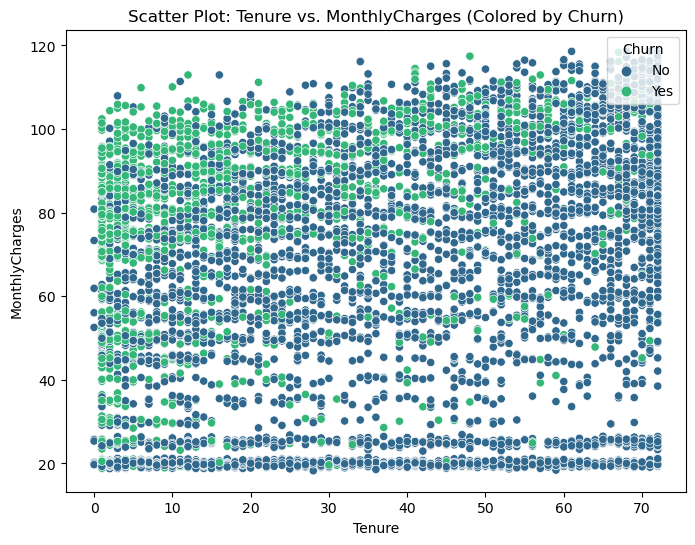

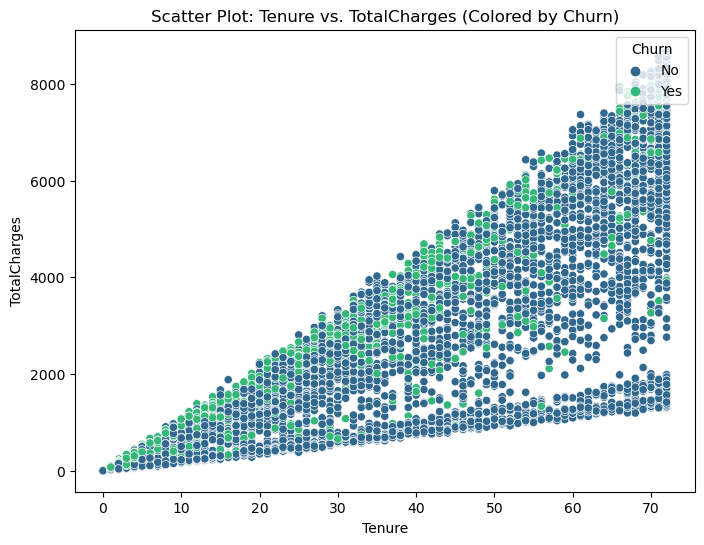

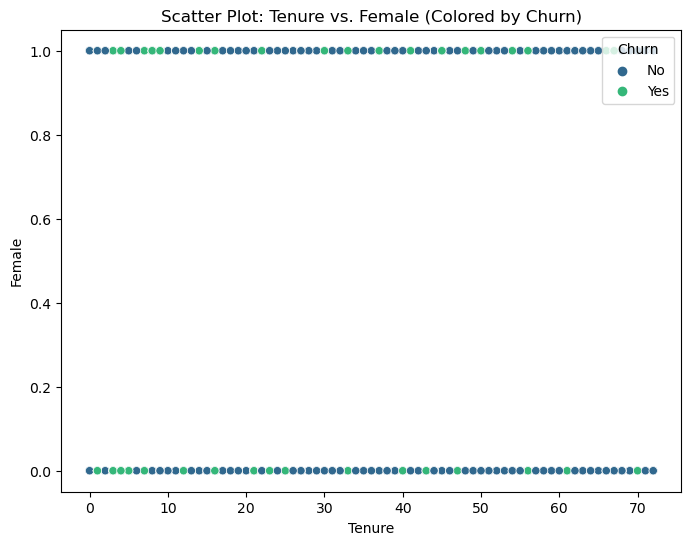

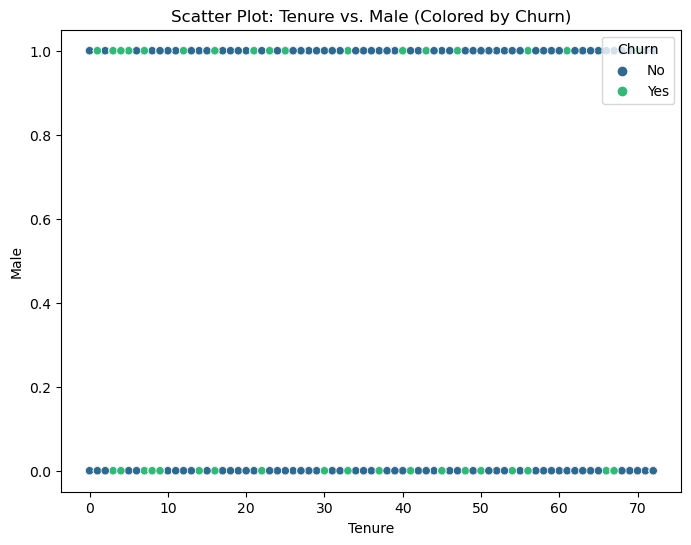

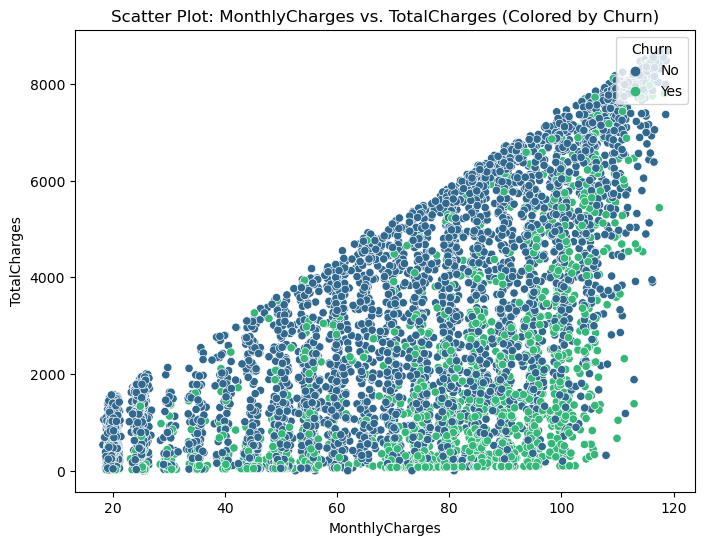

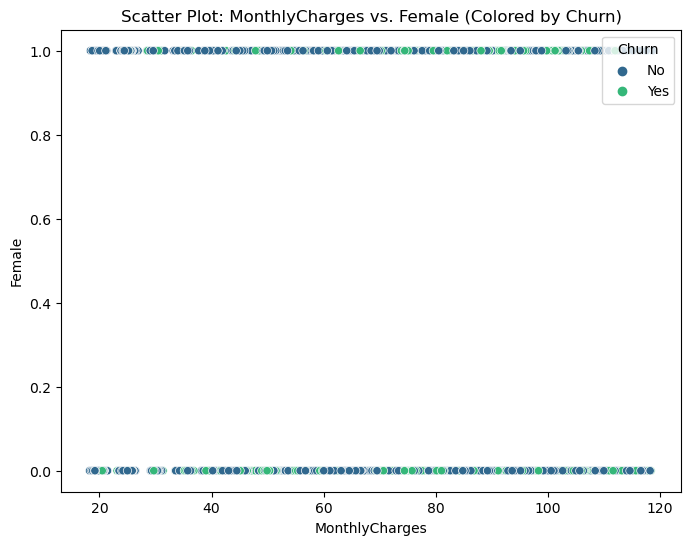

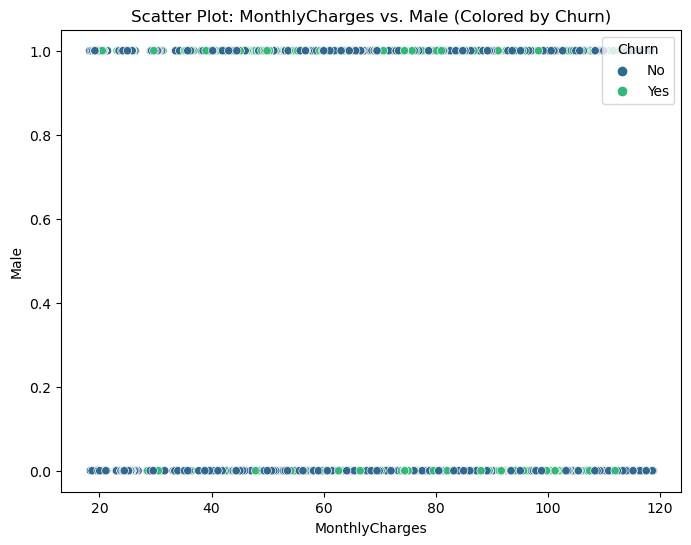

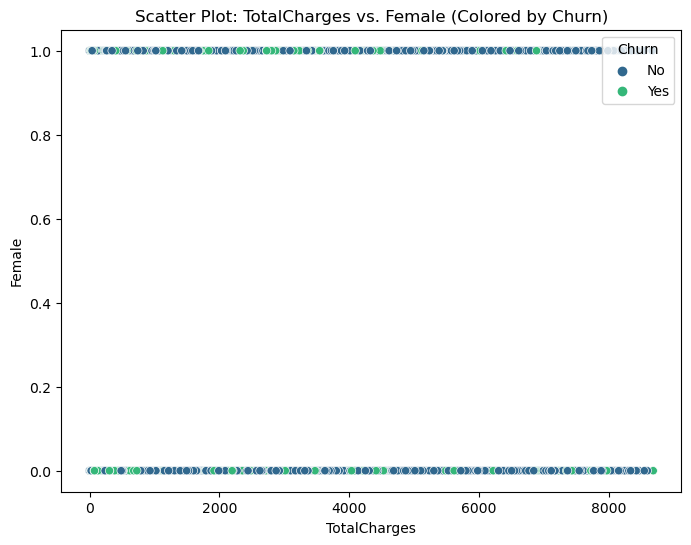

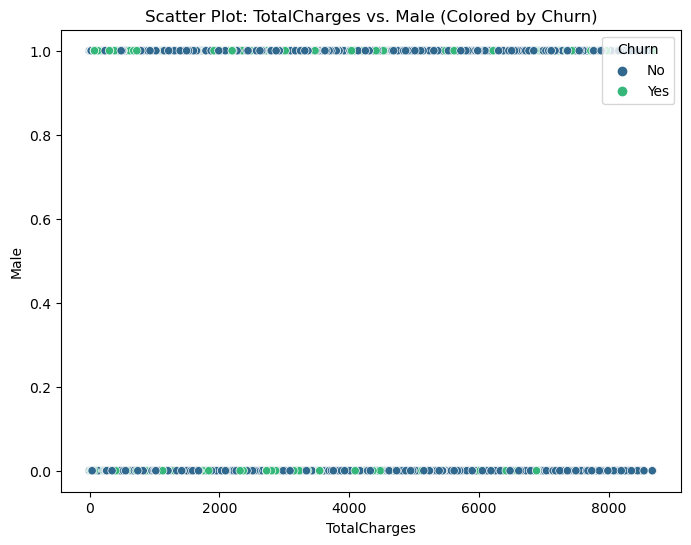

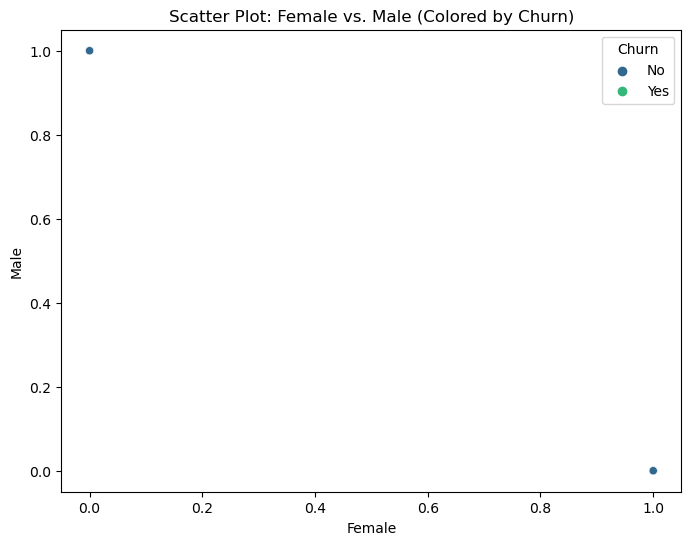

In [197]:
# Identify numeric columns
numeric_columns = new_df.select_dtypes(exclude=['object']).columns

# Create scatter plots for pairs of numeric variables, differentiating by 'Churn' status
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        if i < j:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=new_df, x=col1, y=col2, hue='Churn', palette='viridis')
            plt.title(f'Scatter Plot: {col1} vs. {col2} (Colored by Churn)')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend(title='Churn', loc='upper right')
            plt.show()


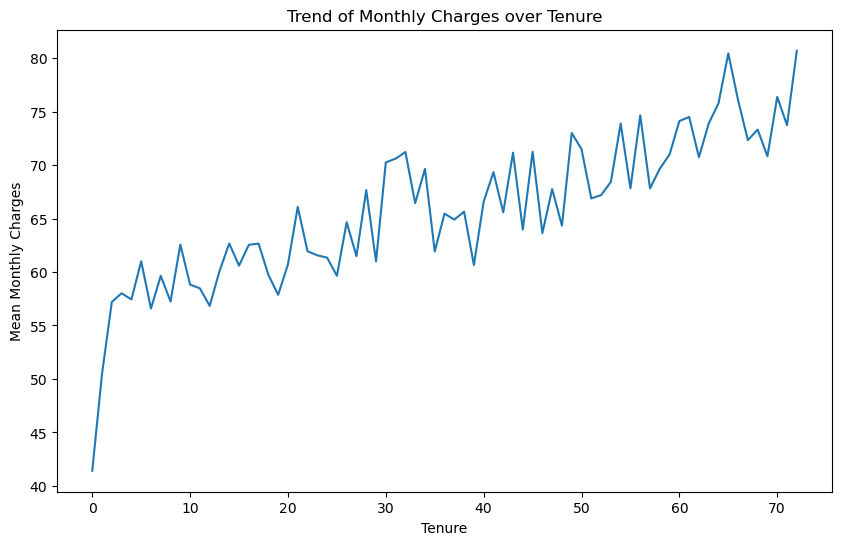

In [199]:
#Trends of monthly charges over tenure

# Compare 'tenure' (numeric) with the mean 'MonthlyCharges' (numeric) over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df, x='Tenure', y='MonthlyCharges', errorbar=None)
plt.title('Trend of Monthly Charges over Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Monthly Charges')
plt.show()


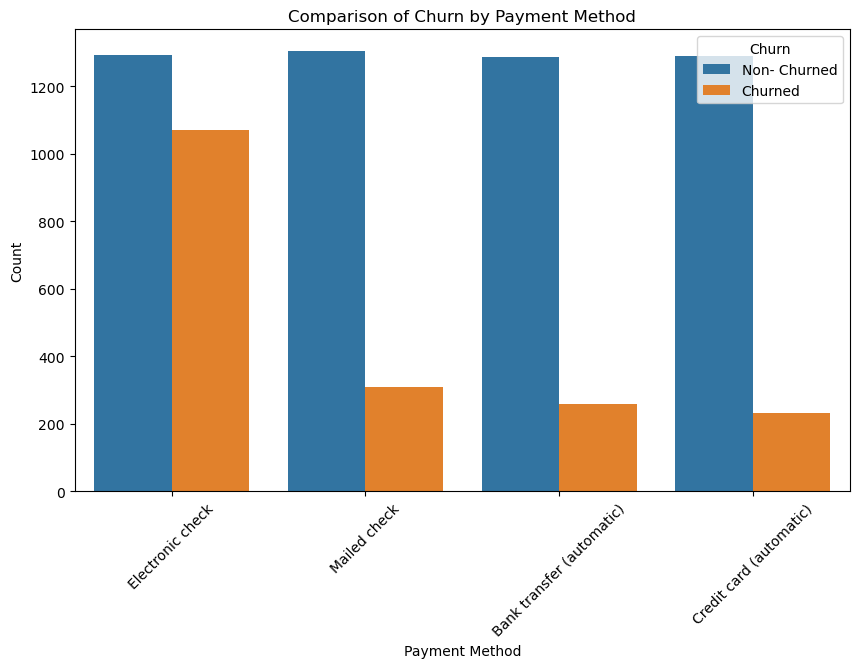

In [200]:
#Comparing churned customers by payment method
# Create a countplot to compare PaymentMethod with Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='PaymentMethod', hue='Churn')
plt.title('Comparison of Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Non- Churned', 'Churned'])
plt.show()


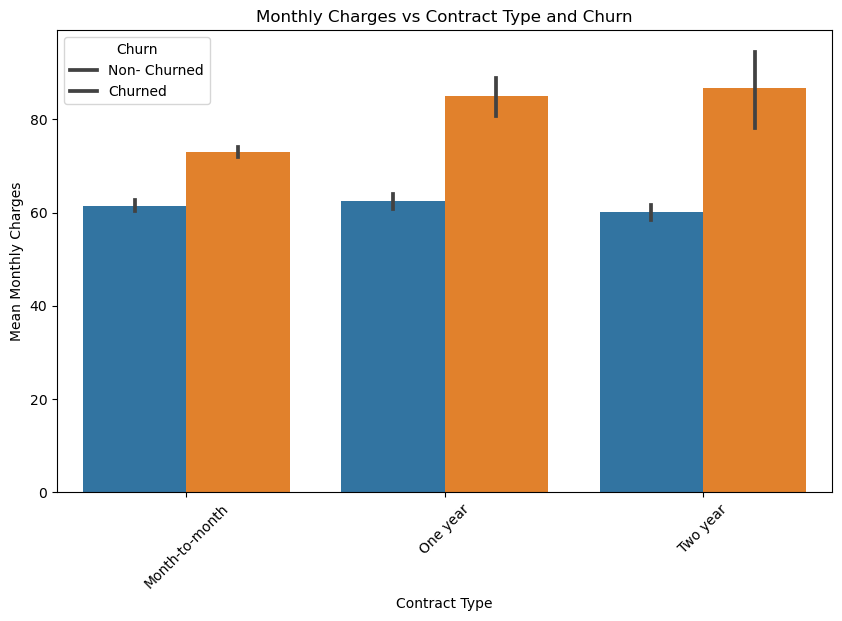

In [203]:
#comparing monthly charges by churn and contract

# Create a grouped barplot to compare MonthlyCharges by Contract and Churn
plt.figure(figsize=(10, 6))
sns.barplot(data=new_df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges vs Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Mean Monthly Charges')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Non- Churned', 'Churned'])
plt.show()


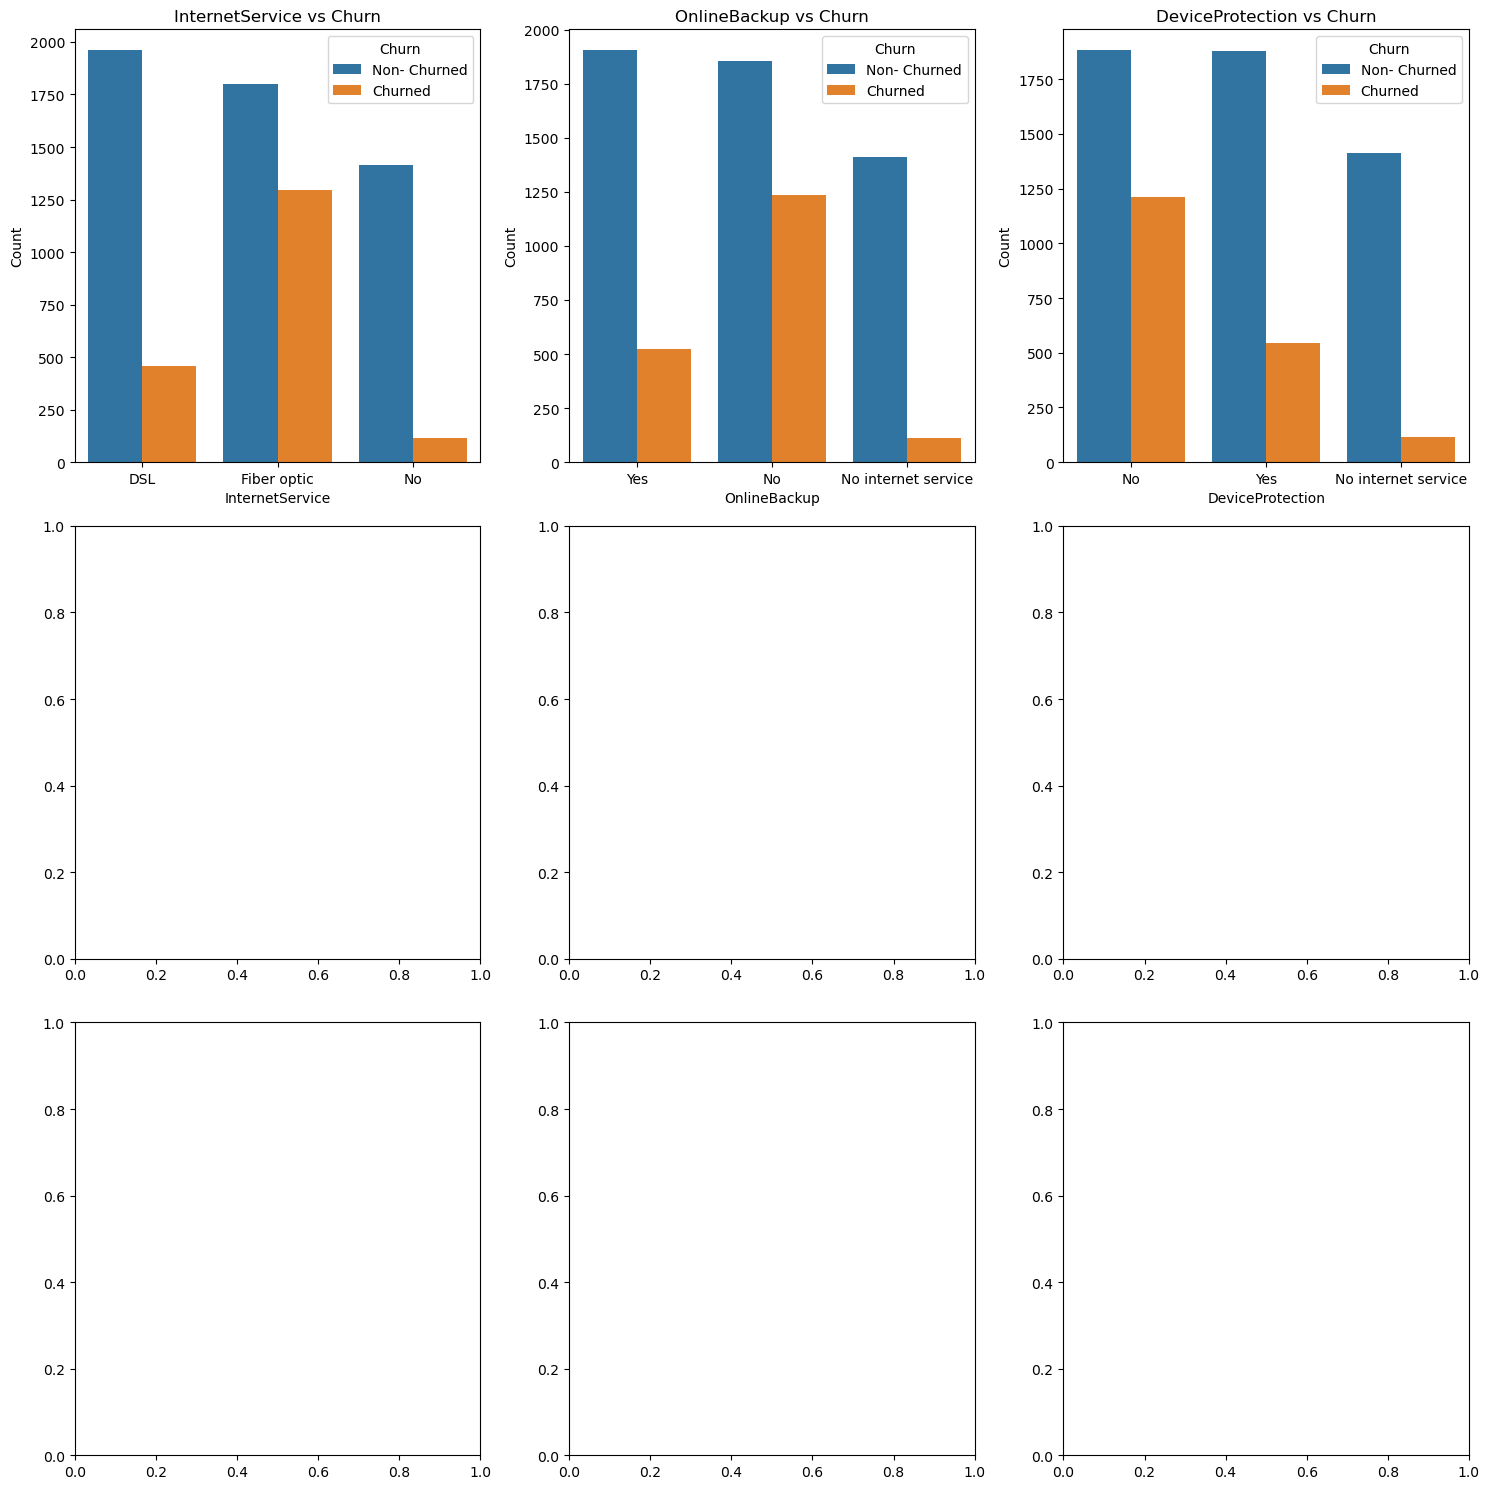

In [210]:
# List of categorical columns to compare with 'Churn'
categorical_columns = [
    'InternetService','OnlineBackup', 'DeviceProtection']


# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate through each categorical column and create a countplot
for i, col in enumerate(categorical_columns):
    row = i // 3
    col_idx = i % 3 # Use a different variable name for the column index

    sns.countplot(data=new_df, x=col, hue='Churn', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} vs Churn')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')
    axes[row, col_idx].legend(title='Churn', labels=['Non- Churned', 'Churned'])

# Adjust layout
plt.tight_layout()
plt.show()


Findings from the visualization

Summary of the project's findings as regards factors influencing churn customers

. The customar churn rates is around 27%
. Monthly customers are likely to churn because of no contract terms.
. Non- senior citizens are high churners.
. Customers with no device protection were likely to churn.
. Many customers who had churned did not sign up for an online backup service for data storage.
. From the visuals above ,it is clear tha customers who use fibre optic internet churn more often than others.


